# Lab | Matplotlib & Seaborn

#### Import all the necessary libraries here:

In [123]:
# Libraries
import numpy as np
# Your Code Here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [124]:
# Matplotlib inline para visualizar los gráficos de Matplotlib
%matplotlib inline
%config Inlinebackend.figure_format= 'retina'

In [125]:
# Configuración para setear y que todas las fig de Seaborn salgan por defecto con este tamaño
# Se puede especificar el tamaño de cada figura
sns.set_context("poster")
sns.set(rc={"figure.figsize": (12.,6.)})
sns.set_style("whitegrid")

## Challenge 
#### Import the `Fitbit2` dataset and store it in a variable called `fitbit`. You can find the dataset in Ironhack's database:
* db: `fitbit`
* table: `fitbit2`

In [126]:
# your code here
fitbit = pd.read_csv('../data/Fitbit2.csv')

#### From the Fitbit data, we want to visually understand:

How the average number of steps change by month. Use the appropriate visualization to show the median steps by month. Is Fitbitter more active on weekend or workdays?
**Hints**:

* Use Months_encoded and Week_or Weekend columns.
* Use matplolib.pyplot object oriented API.
* Set your size figure to 12,4
* Explore plt.sca
* Explore plt.xticks
* Save your figures in a folder called `figures` in your repo. 

In [127]:
fitbit.head()

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,...,Distance_miles,Days,Days_encoded,Work_or_Weekend,Hours Sleep,Sleep efficiency,Yesterday_sleep,Yesterday_sleep_efficiency,Months,Months_encoded
0,2015-05-08,1934,905,0.65,0,1.355,46,0,0,1680,...,0.403891,Friday,4.0,1,6.400000,92.086331,0.000000,0.000000,May,5
1,2015-05-09,3631,18925,14.11,4,611.000,316,61,60,2248,...,8.767545,Saturday,5.0,0,7.566667,92.464358,6.400000,92.086331,May,5
2,2015-05-10,3204,14228,10.57,1,602.000,226,14,77,1719,...,6.567891,Sunday,6.0,0,6.450000,88.761468,7.566667,92.464358,May,5
3,2015-05-11,2673,6756,5.02,8,749.000,190,23,4,9620,...,3.119282,Monday,0.0,1,5.183333,88.857143,6.450000,88.761468,May,5
4,2015-05-12,2495,502,3.73,1,876.000,171,0,0,7360,...,2.317714,Tuesday,1.0,1,6.783333,82.892057,5.183333,88.857143,May,5


In [128]:
fitbit.columns

Index(['Date', 'Calorie burned', 'Steps', 'Distance', 'Floors',
       'Minutes Sedentary', 'Minutes Lightly Active', 'Minutes Fairly Active',
       'Minutes Very Active', 'Activity Calories', 'MinutesOfSleep',
       'MinutesOfBeingAwake', 'NumberOfAwakings', 'LengthOfRestInMinutes',
       'Distance_miles', 'Days', 'Days_encoded', 'Work_or_Weekend',
       'Hours Sleep', 'Sleep efficiency', 'Yesterday_sleep',
       'Yesterday_sleep_efficiency', 'Months', 'Months_encoded'],
      dtype='object')

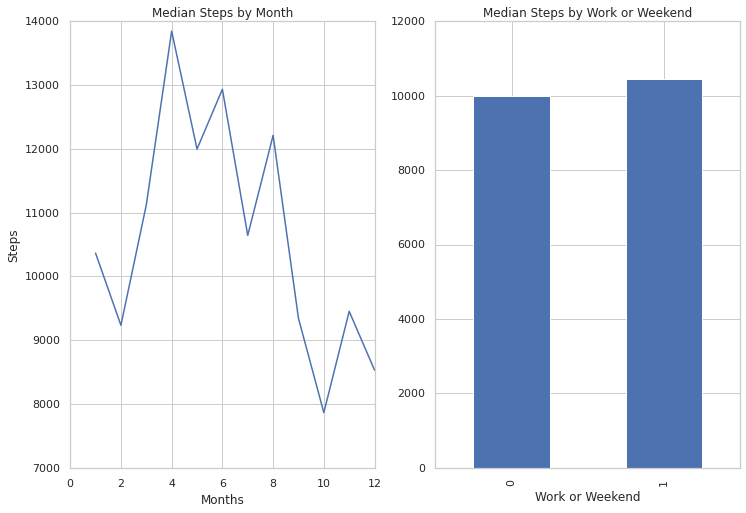

In [129]:
# AVERAGE STEPS BY MONTH_ENCODED
# your code here

step = fitbit['Steps'].groupby(fitbit['Months_encoded']).median()
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12,8))


plt.sca(axs[0])
step.plot(kind='line', ax = axs[0])
plt.title("Median Steps by Month")
plt.xlabel('Months')
plt.ylabel('Steps')

wsteps = fitbit['Steps'].groupby(fitbit['Work_or_Weekend']).median()

plt.sca(axs[1])
wsteps.plot(kind='bar', ax = axs[1])
plt.title("Median Steps by Work or Weekend")
plt.xlabel('Work or Weekend')

plt.savefig('../figures/Ejercio1.png')

#### Write a loop to plot 3 scatter plots of the following features:

* Minutes Lightly Active vs Steps    
* Minutes Very Active vs Steps    
* Minutes Sedentary vs Steps  

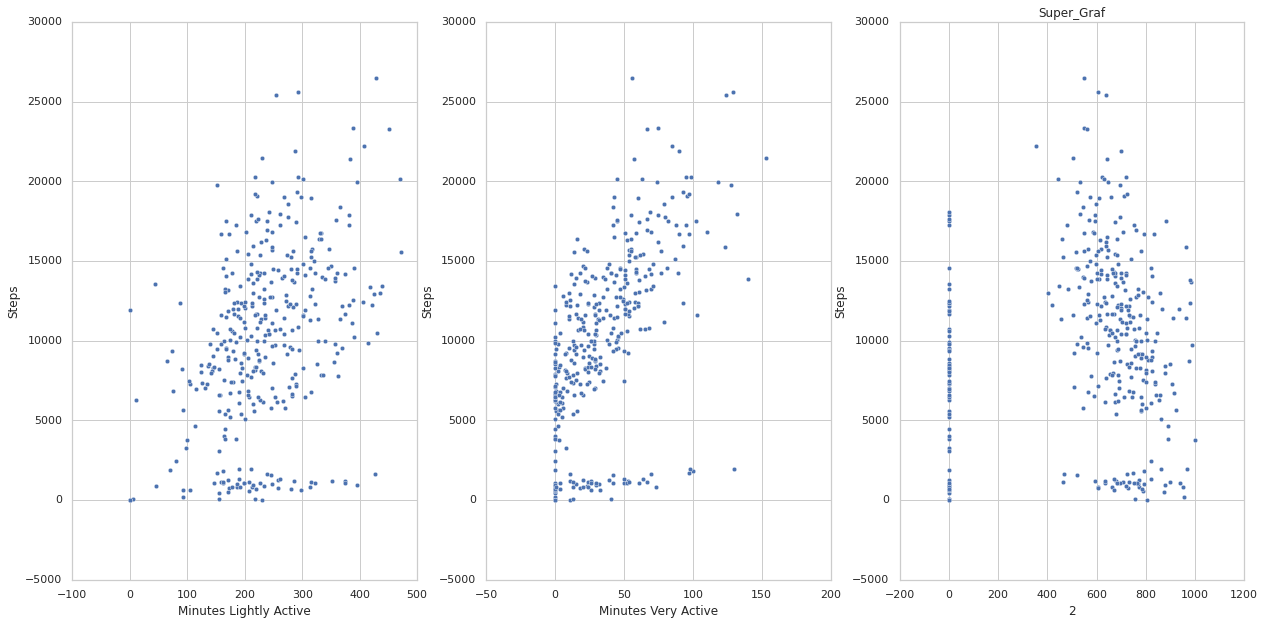

In [130]:
# your code here
fig, axs = plt.subplots(nrows=1, ncols=3, figsize = (21,10))
lista = ['Minutes Lightly Active', 'Minutes Very Active', 'Minutes Sedentary']
for i in range(len(lista)):
    sns.scatterplot(data= fitbit, x = lista[i], y = 'Steps' , ax = axs[i])
    plt.title('Super_Graf')
    plt.xlabel(i)
plt.savefig('../figures/Ejercicio2.png')

## Challenge 

#### Import the `titanic` dataset and store it in a variable called `titanic`. You can find the dataset in Ironhack's database:
* db: `titanic`
* table: `titanic`

In [131]:
# your code here
titanic = pd.read_csv('../data/titanic.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U0,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U0,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U0,S


#### Explore the titanic dataset using Pandas dtypes.

In [132]:
# your code here
titanic.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Gender          object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

#### What are your numerical variables? What are your categorical variables?
**Hint**: Use Pandas select_dtypes.

In [133]:
# NUMERICAL VARIABLES
# your code here
titanic.select_dtypes(include = "number")

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0.0,3,22.000000,1,0,7.2500
1,2,1.0,1,38.000000,1,0,71.2833
2,3,1.0,3,26.000000,0,0,7.9250
3,4,1.0,1,35.000000,1,0,53.1000
4,5,0.0,3,35.000000,0,0,8.0500
...,...,...,...,...,...,...,...
1304,1305,NaN,3,29.513190,0,0,8.0500
1305,1306,NaN,1,39.000000,0,0,108.9000
1306,1307,NaN,3,38.500000,0,0,7.2500
1307,1308,NaN,3,29.513190,0,0,8.0500


In [134]:
# CATEGORICAL VARIABLES
# your code here
titanic.select_dtypes(include = "object")

,Name,Gender,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,U0,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,U0,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,U0,S
...,...,...,...,...,...
1304,"Spector, Mr. Woolf",male,A.5. 3236,U0,S
1305,"Oliva y Ocana, Dona. Fermina",female,PC 17758,C105,C
1306,"Saether, Mr. Simon Sivertsen",male,SOTON/O.Q. 3101262,U0,S
1307,"Ware, Mr. Frederick",male,359309,U0,S


#### Set the plot style to classic and the figure size to (12,6).
**Hint**: To set the style you can use matplotlib or seaborn functions. Do some research on the matter.

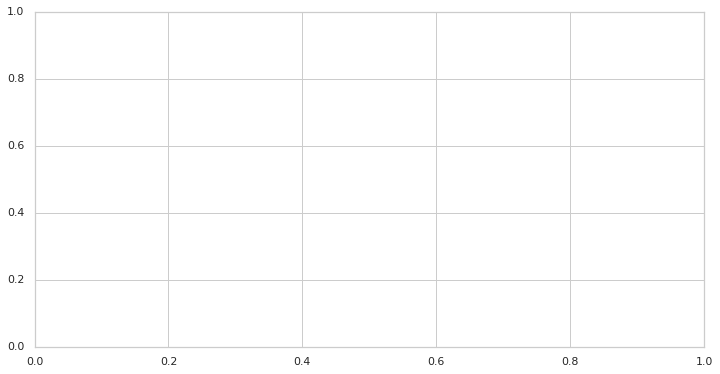

In [135]:
# your code here
fig, axs = plt.subplots(nrows=1, ncols=1, figsize = (12,6))
plt.style.use('classic')

#### Use the right visulalization to show the distribution of column `Age`.

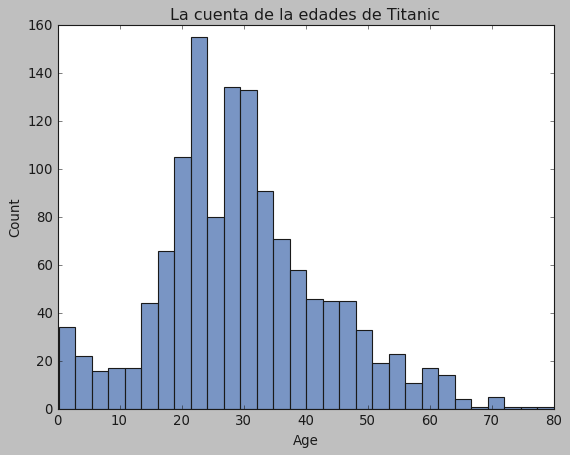

In [136]:
# your code here
sns.histplot(data= titanic, x = 'Age')
plt.title('La cuenta de la edades de Titanic');

#### Use subplots and plot the distribution of the `Age`  with bins equal to 10, 20 and 50.

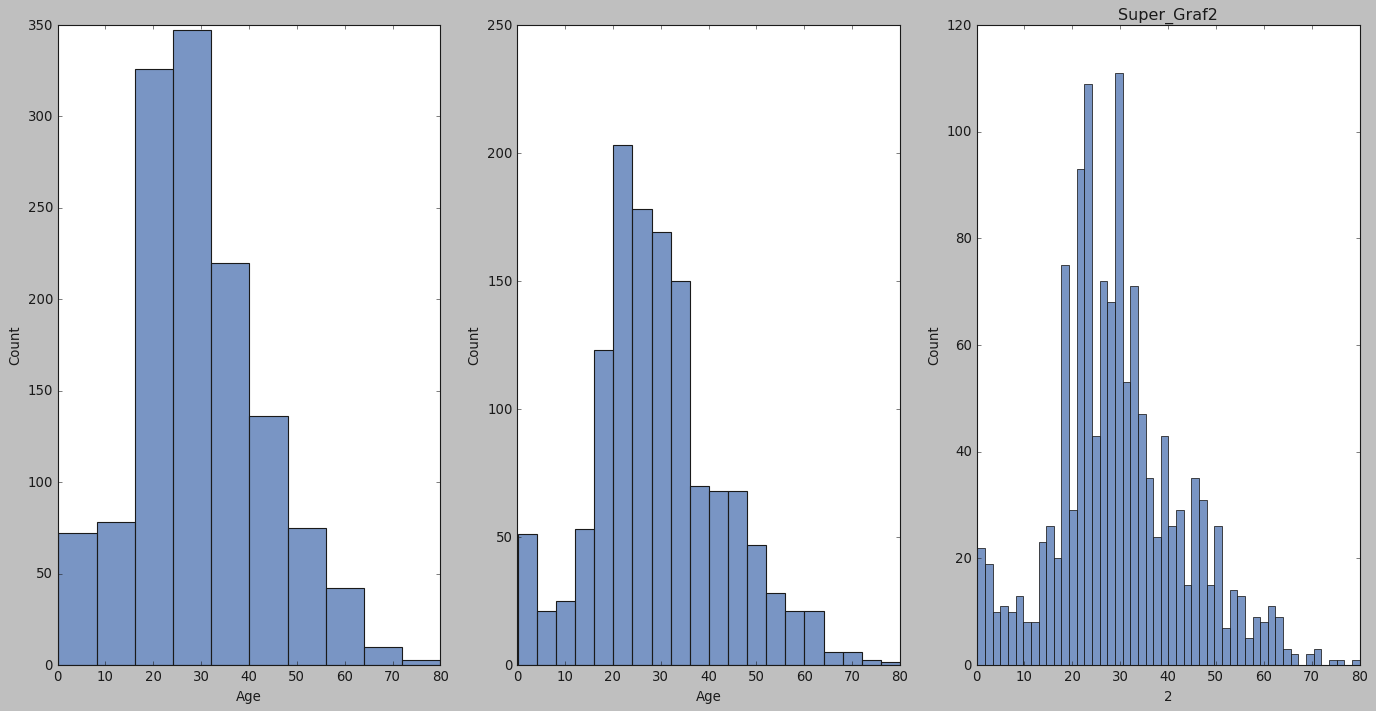

In [137]:
# your code here
fig, axs = plt.subplots(nrows=1, ncols=3, figsize = (21,10))
lista = ['bins a 10', 'bins a 20', 'bins a 50']
binses =(10,20,50)
for i in range(len(lista)):
    sns.histplot(data= titanic, x = 'Age', ax = axs[i] , bins = binses[i])
    plt.xlabel(i)
plt.title('Super_Graf2');

#### How does the bin size affect your plot?

In [138]:
"""
Gets definintion of the sample.
"""

'\nGets definintion of the sample.\n'

#### Use seaborn to show the distribution of column `Age`.

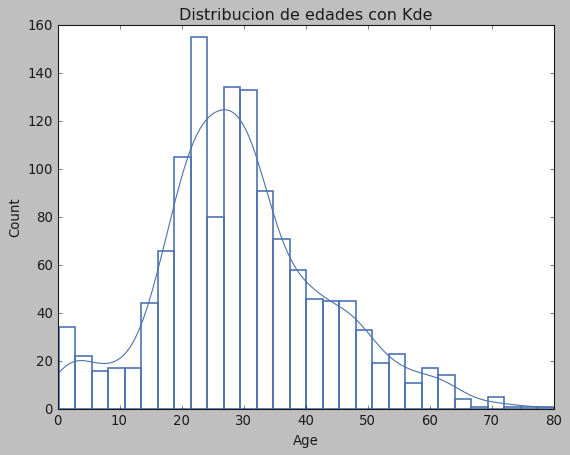

In [139]:
# your code here
sns.histplot(x=titanic.Age, bins=30, fill=None, kde=True)
plt.title('Distribucion de edades con Kde');

#### Use the right plot to visualize column `Gender`. There are 2 ways of doing it. Do it both ways.
**Hint**: Use matplotlib and seaborn.

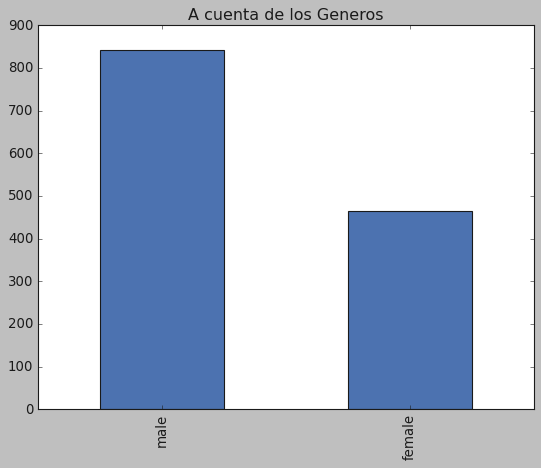

In [140]:
# Method 1 - matplotlib
# your code here
titanic['Gender'].value_counts().plot(kind="bar")
plt.title('A cuenta de los Generos');

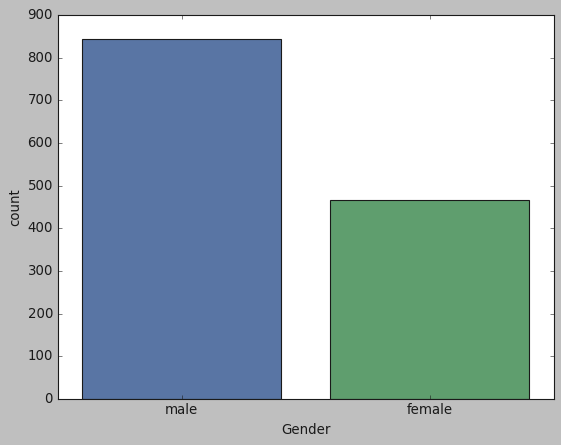

In [141]:

# Method 2 - seaborn
# your code here
sns.countplot(x=titanic.Gender);

#### Use the right plot to visualize the column `Pclass`.

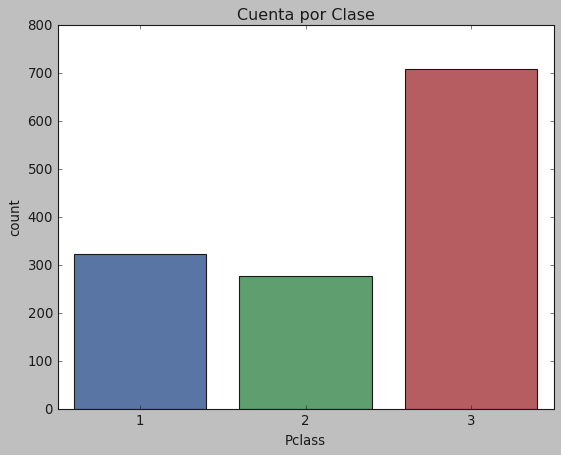

In [142]:
# your code here
sns.countplot(x ='Pclass', data = titanic)
plt.title('Cuenta por Clase');


#### We would like to have in one single plot the summary statistics of the feature `Age`. What kind of plot would you use? Plot it. 

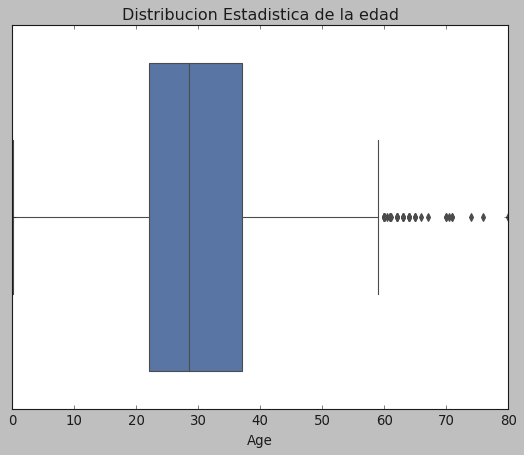

In [143]:
# your code here
sns.boxplot(x=titanic["Age"])
plt.title('Distribucion Estadistica de la edad');

In [144]:
"""
your comments here
Muestra mucha informacion, la mediana, los cuartiles, la presencia de outliers
"""

'\nyour comments here\nMuestra mucha informacion, la mediana, los cuartiles, la presencia de outliers\n'

#### What does the last plot tell you about the feature `Age`?

In [145]:
"""
your comments here
la mayor pare de los pasageros eran de medianea edad, entre 23 y 40 'agnos', perseicia de merores y unos cuantos ancianos.

"""

"\nyour comments here\nla mayor pare de los pasageros eran de medianea edad, entre 23 y 40 'agnos', perseicia de merores y unos cuantos ancianos.\n\n"

#### Now in addition to the summary statistics, we want to have in the same plot the distribution of `Age`. What kind of plot would you use? Plot it. 

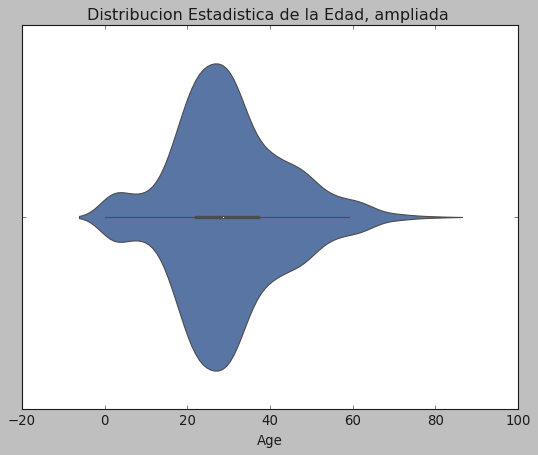

In [146]:
# your code here
sns.violinplot(x=titanic["Age"])
plt.title('Distribucion Estadistica de la Edad, ampliada ');

#### What additional information does the last plot provide about feature `Age`?

In [147]:
"""
your comments here
it shows a distibution for the age. And has the same information as box plot, median, cuartiles, outliers but you lose some information of then(the extrems of the graf)
"""


'\nyour comments here\nit shows a distibution for the age. And has the same information as box plot, median, cuartiles, outliers but you lose some information of then(the extrems of the graf)\n'

#### We suspect that there is a linear relationship between `Fare` and `Age`. Use the right plot to show the relationship between these 2 features. There are 2 ways, please do it both ways.
**Hint**: Use matplotlib and seaborn.

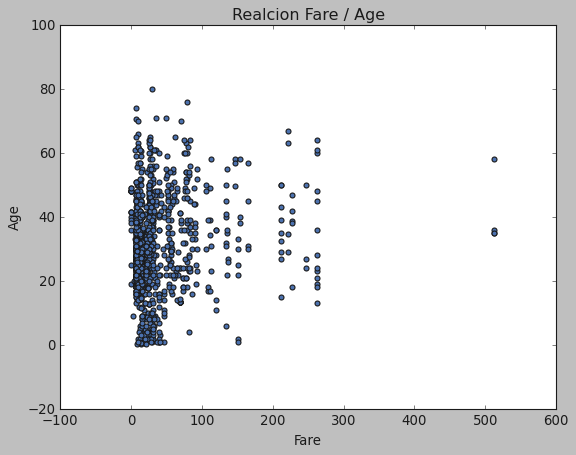

In [148]:
# Method 1 - matplotlib
# your code here
plt.scatter(titanic['Fare'], titanic['Age'])
plt.xlabel('Fare')
plt.ylabel('Age')
plt.title('Realcion Fare / Age');

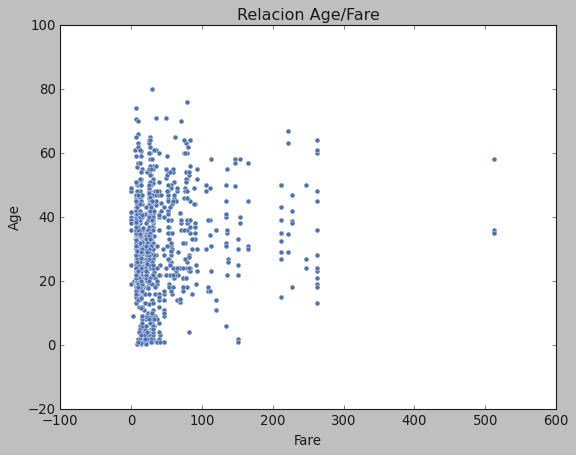

In [149]:
# Method 2 - seaborn
# your code here
sns.scatterplot(x = titanic['Fare'], y = titanic['Age'])
plt.title('Relacion Age/Fare');

#### Plot the correlation matrix using seaborn.

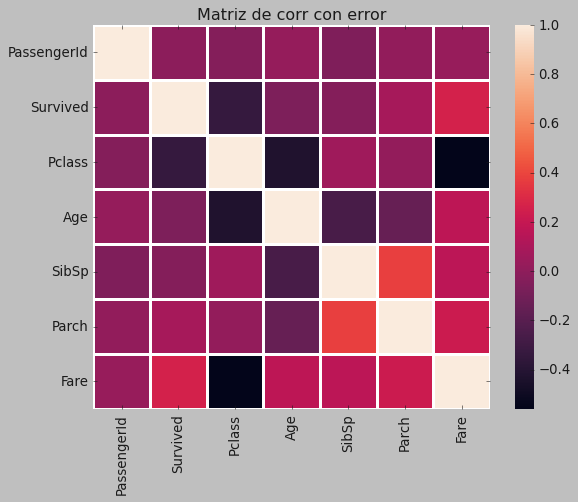

In [150]:
# your code here

sns.heatmap(titanic.corr(),linewidths=1)
plt.title('Matriz de corr con error');


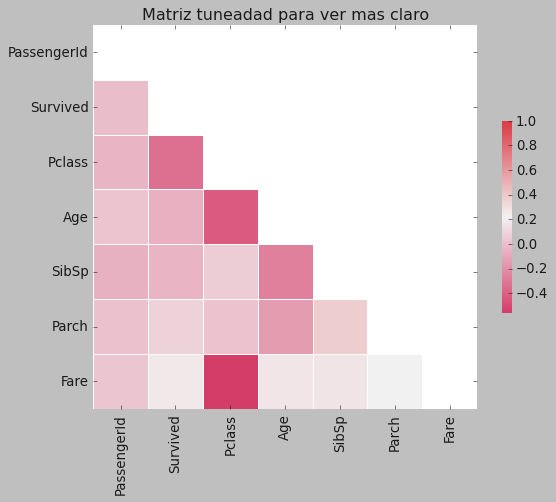

In [151]:
corr = titanic.corr()
mascara = np.triu(np.ones_like(corr, dtype=bool)) # generamos la máscara para la triangular superior
color_map = sns.diverging_palette(0, 10, as_cmap=True) # paleta de colores
sns.heatmap(corr,  
            mask = mascara,
            cmap=color_map,
            square=True, #que los datos se vean como cuadrados
            linewidth=0.5, #ancho de línea
            vmax=1,
            cbar_kws={"shrink": .5} #barra lateral
)
plt.title('Matriz tuneadad para ver mas claro');

#### What are the most correlated features?

In [152]:
"""
your comments here
pclas an Fare
"""

'\nyour comments here\npclas an Fare\n'

#### Use the most appropriate plot to display the summary statistics of `Age` depending on `Pclass`.

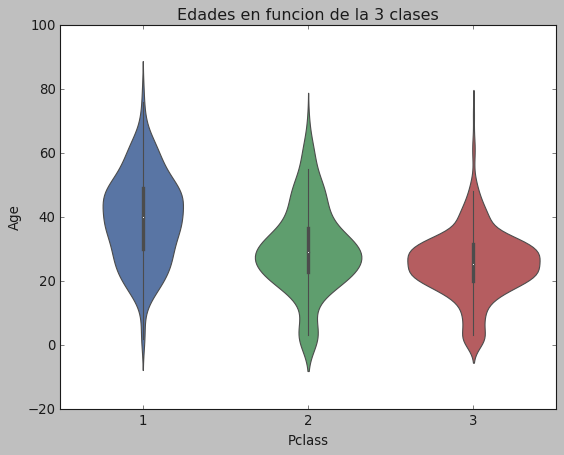

In [153]:
# your code here
sns.violinplot(x="Pclass", y="Age", data=titanic)
plt.title('Edades en funcion de la 3 clases');

#### Use seaborn to plot the distribution of `Age` based on the `Gender`.
**Hint**: Use Facetgrid.

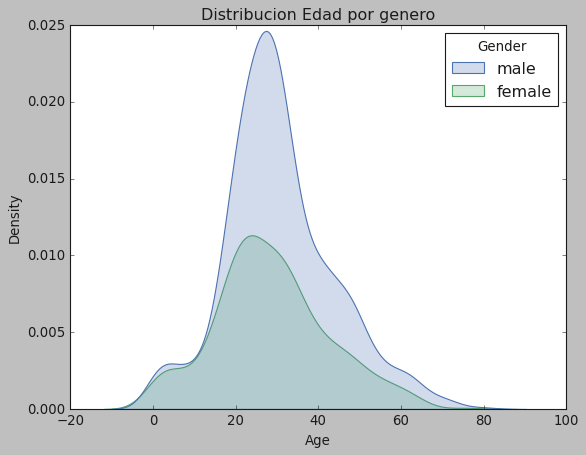

In [154]:
# your code here
sns.kdeplot(x=titanic.Age, hue=titanic.Gender, fill = True)
plt.title('Distribucion Edad por genero');

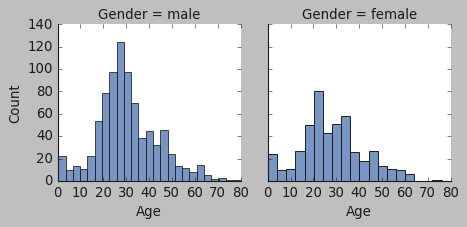

In [155]:
g = sns.FacetGrid(titanic, col="Gender")
g.map_dataframe(sns.histplot, 'Age');

